# 0 - Split del training set fornito da Kaggle

In [1]:
import os
import random
import shutil
import csv

In [2]:
def split_dataset(dataset_path):
    if 'test_images' not in os.listdir(dataset_path):
        os.makedirs(os.path.join(dataset_path,'test_images'))

    if 'val_images' not in os.listdir(dataset_path):
        os.makedirs(os.path.join(dataset_path,'val_images'))

    train_path = os.path.join(dataset_path,'train_images')
    test_path = os.path.join(dataset_path,'test_images')
    val_path = os.path.join(dataset_path,'val_images')

    print(train_path)
    print(test_path)
    print(val_path)

    total_files = 0
    for folder in os.listdir(train_path):
        for file in os.listdir(os.path.join(train_path,folder)):
            total_files += 1

    train_files = int(total_files * 0.80)                   # training sample has to be 80% of total dataset
    test_val_files = total_files - train_files                  # validation/testing sample has to be 20%
    
    print(total_files)
    print('train files are supposed to be', train_files)
    print('test files are supposed to be', test_val_files)

    cnt = 0
    while cnt != test_val_files:
        for folder in os.listdir(train_path):
            if (len(os.listdir(os.path.join(train_path, folder))) != 0):
                file = random.choice(os.listdir(os.path.join(train_path, folder)))
                if os.path.isfile(os.path.join(train_path,folder,file)):
                    # copies the file in test folder
                    shutil.copy(os.path.join(train_path,folder,file), os.path.join(test_path,str(cnt)+'.jpg'))

                    # creates a folder with that hotel id (if it doesn't exist) and moves the image file into it
                    if folder not in os.listdir(val_path):
                        os.makedirs(os.path.join(val_path, folder))
                    shutil.move(os.path.join(train_path,folder,file), os.path.join(val_path, folder))

                    cnt += 1
                    if cnt == test_val_files:
                        break


    for folder in os.listdir(train_path):
        if len(os.listdir(os.path.join(train_path,folder))) == 0:
            print("Directory", os.path.join(train_path,folder), "will be deleted as it's empty")
            os.rmdir(os.path.join(train_path,folder))

    return train_path, val_path, test_path

In [3]:
def generate_csv(train_path, test_path, val_path):
    header_train = ['image_id', 'hotel_id']
    
    with open(os.path.join(dataset_path,'train.csv'), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header_train)
        for hotel_id in os.listdir(train_path):
            for image_id in os.listdir(os.path.join(train_path, hotel_id)):
                writer.writerow([image_id, hotel_id])

    with open(os.path.join(dataset_path,'val.csv'), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header_train)
        for hotel_id in os.listdir(val_path):
            for image_id in os.listdir(os.path.join(val_path, hotel_id)):
                writer.writerow([image_id, hotel_id])

    with open(os.path.join(dataset_path,'test.csv'), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['image_id'])
        for image_id in os.listdir(test_path):
            writer.writerow([image_id])

In [4]:
dataset_path = os.path.join('/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/')

train_path, val_path, test_path = split_dataset(dataset_path)
generate_csv(train_path, test_path, val_path)

/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images
/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/test_images
/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/val_images
44703
train files are supposed to be 35762
test files are supposed to be 8941
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/111413 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/1122 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/11359 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/12178 will be deleted as it's empty
Directory /run/media/michele/Archivio/DL_

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
!nvidia-smi

Wed Dec 14 15:05:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.11    Driver Version: 525.60.11    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8    N/A /  N/A |      4MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1 - Caricamento del set di test e di training

In [1]:
import os
import albumentations as A
import albumentations.pytorch as APT
from PIL import Image

/home/michele/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = os.path.join('/run/media/michele/Archivio/DL_project/hotel-id-to-combat-human-trafficking-2022-fgvc9/')

train_path = os.path.join(dataset_path, 'train_images')
test_path = os.path.join(dataset_path, 'test_images')
val_path = os.path.join(dataset_path, 'val_images')

In [3]:
import albumentations as A
import albumentations.pytorch as APT

IMG_SIZE = 128

occlusion_transform = A.CoarseDropout(p=1, max_holes=1, min_height=IMG_SIZE//4, max_height=IMG_SIZE//2,
                                      min_width=IMG_SIZE//4, max_width=IMG_SIZE//2, fill_value=(255, 0, 0))

# transform used for the obtained training set
train_transform = A.Compose([A.HorizontalFlip(p=0.75),
                            A.VerticalFlip(p=0.25),
                            A.ShiftScaleRotate(p=0.5),
                            A.OpticalDistortion(p=0.25),
                            A.Perspective(p=0.25),
                            A.CoarseDropout(p=0.5, min_holes=1, max_holes=6, 
                                            min_height=IMG_SIZE//16, max_height=IMG_SIZE//4,
                                            min_width=IMG_SIZE//16, max_width=IMG_SIZE//4),
                            occlusion_transform,
                            A.Resize(IMG_SIZE, IMG_SIZE),
                            A.RandomBrightnessContrast(p=0.75),
                            A.ToFloat(),
                            APT.transforms.ToTensorV2()])

# transform used for the validation/test set
val_transform = A.Compose([occlusion_transform,
                            A.Resize(IMG_SIZE, IMG_SIZE),
                            A.ToFloat(),
                            APT.transforms.ToTensorV2()])

In [4]:
class HotelDataset:
    def __init__(self, _data, _transform=None, _data_path=train_path, _train_val=True):
        self.data = _data
        self.transform = _transform
        self.data_path = _data_path
        self.train_val = _train_val

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        record = self.data.iloc[idx]

        if self.train_val:
            image_path = os.path.join(self.data_path,str(record['hotel_id']),record['image_id'])
        else:
            image_path = os.path.join(self.data_path,record['image_id'])
        
        image = np.array(Image.open(image_path)).astype(np.uint8)
        label = record['hotel_id']

        if self.transform:
            transformed = self.transform(image=image)
            image = transformed['image']
        
        if self.train_val:
            return image, label
        else:
            return image

# 2 - Definizione del modello

In [5]:
import torch
import timm
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from torch.optim import SGD
import matplotlib.pyplot as plt
import torchvision

import numpy as np

import pytorch_lightning as pl

## 2.1 - HotelPredictionNetwork v1 (only classification)

In [6]:
class HotelPredictionNetwork(pl.LightningModule):
    def __init__(self, n_classes, embedding_size, extractor_name='efficientnet_b0'):
        super(HotelPredictionNetwork, self).__init__()
        self.save_hyperparameters()

        self.extractor = timm.create_model(extractor_name, num_classes=n_classes, pretrained=True)
        in_features = self.extractor.get_classifier().in_features

        self.extractor.classifier = nn.Identity()

        self.embedding = nn.Linear(in_features, embedding_size)
        self.classifier = nn.Linear(embedding_size, n_classes)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        x = self.extractor(x)
        x = x.view(x.shape[0], -1)
        x = self.embedding(x)

        return x

    def embed_and_classify(self, x):
        x = self.forward(x)
        return x, self.classifier(x)

    def configure_optimizers(self):
        optimizer = SGD(self.parameters(), lr=0.001)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        x, y = train_batch
        _, output = self.embed_and_classify(x)
        loss = self.criterion(output, y)
        self.log('train/loss', loss)
        return loss

    def validation_step(self, val_batch, batch_idx):
        x, y = val_batch
        output = self.forward(x)

        acc = accuracy_score(y.cpu(), output.cpu().topk(1).indices)

        self.log('val/accuracy', acc)

## 2.2 - HotelPredictionNetworkv2 - Metric Learning

In [ ]:
from torch.nn import functional as F

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, m=2):
        super(ContrastiveLoss, self).__init__()
        self.m = m

    def forward(self, phi_i, phi_j, l_ij):
        l_ij = l.ij.float()
        d = F.pairwise_distance(phi_i, phi_j)
        l = (0.5 * (1 - l_ij) * torch.pow(d, 2)) + (0.5 * l_ij * torch.pow(torch.clamp(self.m - d, min=0),2))

        return l.mean()

In [ ]:
class HotelPredictionNetwork(pl.LightningModule):
    def __init__(self, n_classes, embedding_size, extractor_name='efficientnet_b0'):
        super(HotelPredictionNetwork, self).__init__()
        self.save_hyperparameters()

        self.extractor = timm.create_model(extractor_name, num_classes=n_classes, pretrained=True)
        in_features = self.extractor.get_classifier().in_features

        self.extractor.classifier = nn.Identity()

        self.embedding = nn.Linear(in_features, embedding_size)
        self.classifier = nn.Linear(embedding_size, n_classes)
        self.criterion = nn.ContrastiveLoss()

    def forward(self, x):
        x = self.extractor(x)
        x = x.view(x.shape[0], -1)
        x = self.embedding(x)

        return x

    def embed_and_classify(self, x):
        x = self.forward(x)
        return x, self.classifier(x)

    def configure_optimizers(self):
        optimizer = SGD(self.parameters(), lr=0.001)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        I_i, I_j, l_ij, *_ = train_batch

        phi_i = self.embedding(I_i)
        phi_j = self.embedding(I_j)

        loss = self.criterion(phi_i, phi_j, l_ij)

        self.log('train/loss', loss)
        return loss

    def validation_step(self, val_batch, batch_idx):
        I_i, I_j, l_ij, *_ = val_batch

        phi_i = self.embedding(I_i)
        phi_j = self.embedding(I_j)

        loss = self.criterion(phi_i, phi_j, l_ij)

        self.log('val/loss')

        if batch_idx==0:
            self.logger.experiment.add_embedding(phi_i, batch[3], I_i, global_step=self.global_step)

In [7]:
import pandas as pd

df_train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df_val = pd.read_csv(os.path.join(dataset_path, 'val.csv'))

In [8]:
hotel_train = HotelDataset(df_train, train_transform, train_path)
hotel_val = HotelDataset(df_val, val_transform, val_path)

In [9]:
hotel_train_loader = DataLoader(hotel_train, batch_size=16, num_workers=8, shuffle=True)
hotel_val_loader = DataLoader(hotel_val, batch_size=16, num_workers=8)

#print(next(iter(hotel_train_loader)))


torch.Size([16, 3, 128, 128])


IndexError: index 3 is out of bounds for dimension 0 with size 3

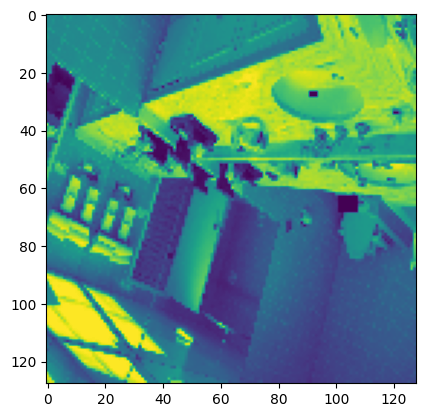

In [10]:
dataiter = next(iter(hotel_train_loader))
images = dataiter[0]
labels = dataiter[1]

print(images.shape)

for i in range(len(images)):
    for c in range(i):
        plt.imshow(images[i][c])
        
print(labels)

In [11]:
n_classes_train = df_train['hotel_id'].max()
n_classes_val = df_val['hotel_id'].max()

n_classes = max(n_classes_train, n_classes_val) + 1
print(n_classes)

print(n_classes_val.min(0))

model = HotelPredictionNetwork(n_classes, 128)

trainer = pl.Trainer(max_epochs=1, accelerator="gpu", devices=1)

690366
690365


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
trainer.fit(model, hotel_train_loader, hotel_val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params
------------------------------------------------
0 | extractor  | EfficientNet     | 4.0 M 
1 | embedding  | Linear           | 163 K 
2 | classifier | Linear           | 89.1 M
3 | criterion  | CrossEntropyLoss | 0     
------------------------------------------------
93.2 M    Trainable params
0         Non-trainable params
93.2 M    Total params
372.915   Total estimated model params size (MB)


Epoch 0: 100%|██████████| 2795/2795 [56:15<00:00,  1.21s/it, loss=13.3, v_num=5] 

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 2795/2795 [56:16<00:00,  1.21s/it, loss=13.3, v_num=5]


In [13]:
trainer.validate(model, hotel_val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 559/559 [09:20<00:00,  1.00s/it]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val/accuracy        │            0.0            │
└───────────────────────────┴───────────────────────────┘

[{'val/accuracy': 0.0}]